In [1]:
#!/usr/bin/env python
%matplotlib inline  

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st 

import resource
resource.setrlimit(resource.RLIMIT_NOFILE, (1000,-1)) #allow many plots


In [34]:
obstimes=np.array([0,2,4,8,12,24]) #observation weeks post first positive

vlobs=pd.read_csv('sparsedata.csv',usecols=range(1,7))
ets=pd.read_csv('truetimes.csv',usecols=range(1,2))



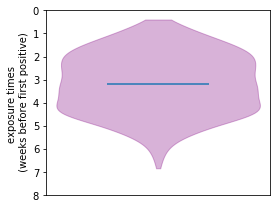

In [58]:
plt.figure(figsize=(4,3))
vp=plt.violinplot(np.array(ets[vlobs['0']>0])/7,widths=0.6,showextrema=False,showmedians=True)
for pc in vp['bodies']:
    pc.set_facecolor('purple')
    pc.set_edgecolor('purple')
    
plt.yticks(range(-8,1),-np.arange(-8,1))
plt.xticks([])
plt.ylabel('exposure times \n (weeks before first positive)')
plt.tight_layout()
plt.savefig('truetimes.pdf')

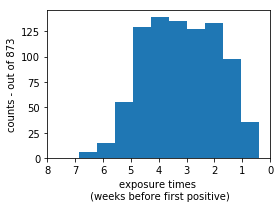

In [63]:
plt.figure(figsize=(4,3))
plt.hist(np.array(ets[vlobs['0']>0])/7)

plt.xticks(range(-8,1),-np.arange(-8,1))
#plt.xticks([])
plt.xlabel('exposure times \n (weeks before first positive)')
plt.ylabel('counts - out of ' + str(sum(vlobs['0']>0)))
plt.tight_layout()
plt.savefig('truetimes2.pdf')

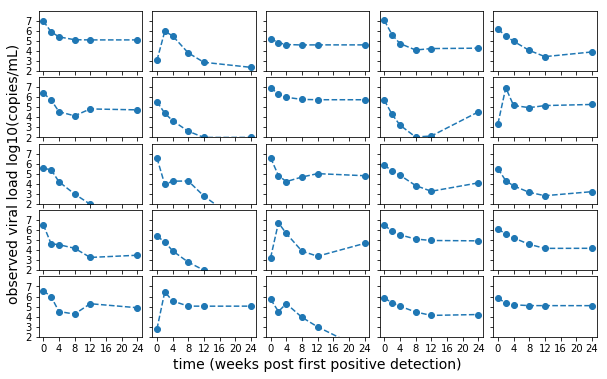

In [64]:
#plot model fitting results
nx=5; ny=5;
fig,axarr=plt.subplots(ny,nx,sharey=True,sharex=True,
                       figsize=(10,6),
                       gridspec_kw={'wspace':0.1,'hspace':0.1})

nplots=25
inp=0
ppt=0
while inp < nplots:
    if (vlobs.iloc[ppt,:]>0).any():
        axarr[int(inp/nx)][inp%nx].plot(obstimes,vlobs.iloc[ppt,:],'--o')
        plt.ylim([-3,8])
        inp+=1
        ppt+=1
    else:
        ppt+=1
        

axarr[2][0].set_ylabel('observed viral load log10(copies/mL)',fontsize=14)
axarr[4][2].set_xlabel('time (weeks post first positive detection)',fontsize=14)

axarr[0][0].set_xticks(range(0,25,4))
axarr[0][0].set_yticks(range(2,8))
axarr[0][0].set_ylim([2,8])

fig.savefig('ex_sparse.pdf')